<a href="https://colab.research.google.com/github/sankeawthong/Project-1-Lita-Chatbot/blob/main/Hybrid%20K-NN%20-%20Bi-LSTM%20for%2010%20class%20classifications%20based%20on%20UNSW-NB15%20dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Hybrid K-NN - Bi-LSTM for 10 class classifications based on UNSW-NB15 dataset**

In [14]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
from keras.models import Sequential
from keras.layers import LSTM, Dense
from sklearn.metrics import accuracy_score

In [15]:
# Load the dataset
dataset = pd.read_csv("dataset_P2.2.csv")
dataset.shape
dataset.isnull().sum()
dataset.info()
dataset["Class"].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175341 entries, 0 to 175340
Data columns (total 41 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   id                 175341 non-null  int64  
 1   dur                175341 non-null  float64
 2   spkts              175341 non-null  int64  
 3   dpkts              175341 non-null  int64  
 4   sbytes             175341 non-null  int64  
 5   dbytes             175341 non-null  int64  
 6   rate               175341 non-null  float64
 7   sttl               175341 non-null  int64  
 8   dttl               175341 non-null  int64  
 9   sload              175341 non-null  float64
 10  dload              175341 non-null  float64
 11  sloss              175341 non-null  int64  
 12  dloss              175341 non-null  int64  
 13  sinpkt             175341 non-null  float64
 14  dinpkt             175341 non-null  float64
 15  sjit               175341 non-null  float64
 16  dj

array([0, 2, 1, 5, 8, 7, 4, 3, 9, 6])

**Data preprocessing**

In [16]:
# Data preprocessing
y = dataset['Class'].values
X = dataset.drop(['Class'], axis=1)
X = X.values

In [17]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Data balancing using SMOTE
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [18]:

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

**K-NN Model**

In [19]:
# Train the K-NN classifier
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(X_train, y_train)

# Obtain predictions from the K-NN classifier
knn_pred = knn_model.predict(X_test)

**Bi-LSTM Model**

In [25]:
from keras.utils import to_categorical
from keras.layers import Bidirectional

# Reshape the input data for Bi-LSTM (assuming you want to consider a single feature)
X_train_bilstm = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_bilstm = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Convert class labels to categorical representation
num_classes = len(np.unique(y))
y_train_categorical = to_categorical(y_train, num_classes)
y_test_categorical = to_categorical(y_test, num_classes)

# Train the Bi-LSTM model
bilstm_model = Sequential()
bilstm_model.add(Bidirectional(LSTM(64), input_shape=(X_train_bilstm.shape[1], X_train_bilstm.shape[2])))
bilstm_model.add(Dense(num_classes, activation='softmax'))
bilstm_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
bilstm_model.fit(X_train_bilstm, y_train_categorical, epochs=10, batch_size=64)

# Obtain predictions from the Bi-LSTM model
bilstm_pred = np.argmax(bilstm_model.predict(X_test_bilstm), axis=1)

Epoch 1/10
7000/7000 [==============================] - 301s 43ms/step - loss: 0.9375 - accuracy: 0.6424
Epoch 2/10
7000/7000 [==============================] - 298s 43ms/step - loss: 0.7874 - accuracy: 0.6919
Epoch 3/10
7000/7000 [==============================] - 298s 43ms/step - loss: 0.7482 - accuracy: 0.7043
Epoch 4/10
7000/7000 [==============================] - 300s 43ms/step - loss: 0.7252 - accuracy: 0.7107
Epoch 5/10
7000/7000 [==============================] - 298s 43ms/step - loss: 0.7134 - accuracy: 0.7156
Epoch 6/10
7000/7000 [==============================] - 298s 43ms/step - loss: 0.6990 - accuracy: 0.7191
Epoch 7/10
7000/7000 [==============================] - 297s 42ms/step - loss: 0.6884 - accuracy: 0.7228
Epoch 8/10
7000/7000 [==============================] - 298s 43ms/step - loss: 0.6810 - accuracy: 0.7253
Epoch 9/10
7000/7000 [==============================] - 296s 42ms/step - loss: 0.6778 - accuracy: 0.7268
Epoch 10/10
3500/3500 [==============================] 

In [26]:
# Combine predictions from K-NN and LSTM models
hybrid_pred = np.where(knn_pred == bilstm_pred, knn_pred, -1)  # Replace non-matching predictions with -1

# Final prediction using the majority vote
final_pred = np.where(hybrid_pred == -1, knn_pred, hybrid_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, final_pred)
print("Hybrid Model Accuracy:", accuracy)

Hybrid Model Accuracy: 0.6596339285714286


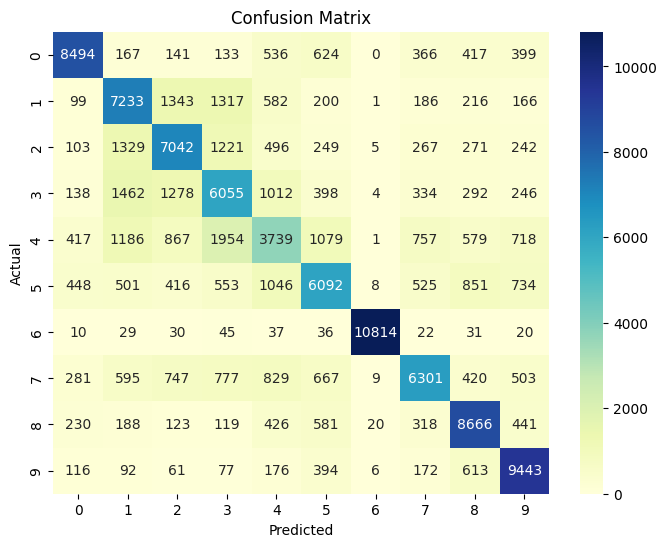

In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Create a confusion matrix
cm = confusion_matrix(y_test, final_pred)

# Get the class labels
class_labels = np.unique(y_test)

# Create a DataFrame for the confusion matrix
cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

# Visualize the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm_df, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from sklearn import metrics 
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
def conf_mat(d1,d2):
  cm = confusion_matrix(d1, d2)
  plt.figure(figsize=(6,5.5))
  ax = sns.heatmap(cm,  fmt='2', annot=True, cmap='YlGnBu')
  sns.set(font_scale=1)
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values\n');
  ax.xaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  ax.yaxis.set_ticklabels(['Normal','Flooding','Blackhole','Forwarding'])
  plt.tight_layout()
  # plt.savefig("F1.eps", format = 'eps')
  plt.show()

In [28]:
print("Confusion Matrix of Hybrid KNN-Bi-LSTM Model") 
confusion_matrix(y_test, final_pred)

Confusion Matrix of Hybrid KNN-LSTM Model


array([[ 8494,   167,   141,   133,   536,   624,     0,   366,   417,
          399],
       [   99,  7233,  1343,  1317,   582,   200,     1,   186,   216,
          166],
       [  103,  1329,  7042,  1221,   496,   249,     5,   267,   271,
          242],
       [  138,  1462,  1278,  6055,  1012,   398,     4,   334,   292,
          246],
       [  417,  1186,   867,  1954,  3739,  1079,     1,   757,   579,
          718],
       [  448,   501,   416,   553,  1046,  6092,     8,   525,   851,
          734],
       [   10,    29,    30,    45,    37,    36, 10814,    22,    31,
           20],
       [  281,   595,   747,   777,   829,   667,     9,  6301,   420,
          503],
       [  230,   188,   123,   119,   426,   581,    20,   318,  8666,
          441],
       [  116,    92,    61,    77,   176,   394,     6,   172,   613,
         9443]])